<h1 align="center">EDA (Exploratory Data Analysis)</h1>

## Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
df = pd.read_csv('../data/raw_dataset/mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


Now we analyze some basic information from the dataset

In [6]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [7]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


## Missing values

Let's explore if in the dataset are some missing values

In [8]:
missing_data = df.isnull()
missing_data.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Timestamp
Timestamp
False    736
Name: count, dtype: int64

Age
Age
False    735
True       1
Name: count, dtype: int64

Primary streaming service
Primary streaming service
False    735
True       1
Name: count, dtype: int64

Hours per day
Hours per day
False    736
Name: count, dtype: int64

While working
While working
False    733
True       3
Name: count, dtype: int64

Instrumentalist
Instrumentalist
False    732
True       4
Name: count, dtype: int64

Composer
Composer
False    735
True       1
Name: count, dtype: int64

Fav genre
Fav genre
False    736
Name: count, dtype: int64

Exploratory
Exploratory
False    736
Name: count, dtype: int64

Foreign languages
Foreign languages
False    732
True       4
Name: count, dtype: int64

BPM
BPM
False    629
True     107
Name: count, dtype: int64

Frequency [Classical]
Frequency [Classical]
False    736
Name: count, dtype: int64

Frequency [Country]
Frequency [Country]
False    736
Name: count, dtype: int64

Frequency [EDM]
Frequency [EDM]

There is missing value in the following columns:
- Age (1)
- Primary Streaming service (1)
- While working (3)
- Instrumentalist (4)
- Composer (1)
- Foreign languages (4)
- BPM (107)
- Music effects (8)

Later we will work with these missing values.


## Analyzing Individual Feature Patterns Using Visualization

### Numeric Variables

First of all lets analize the correlation between numeric variables

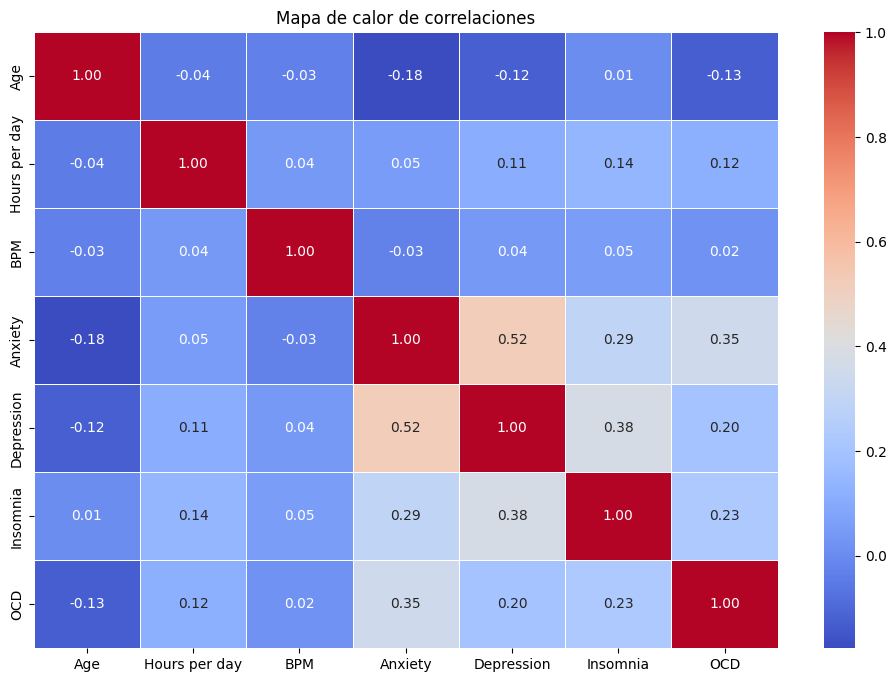

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

Now lets see somo graphs

In [16]:
# Definir las columnas a graficar
columns = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

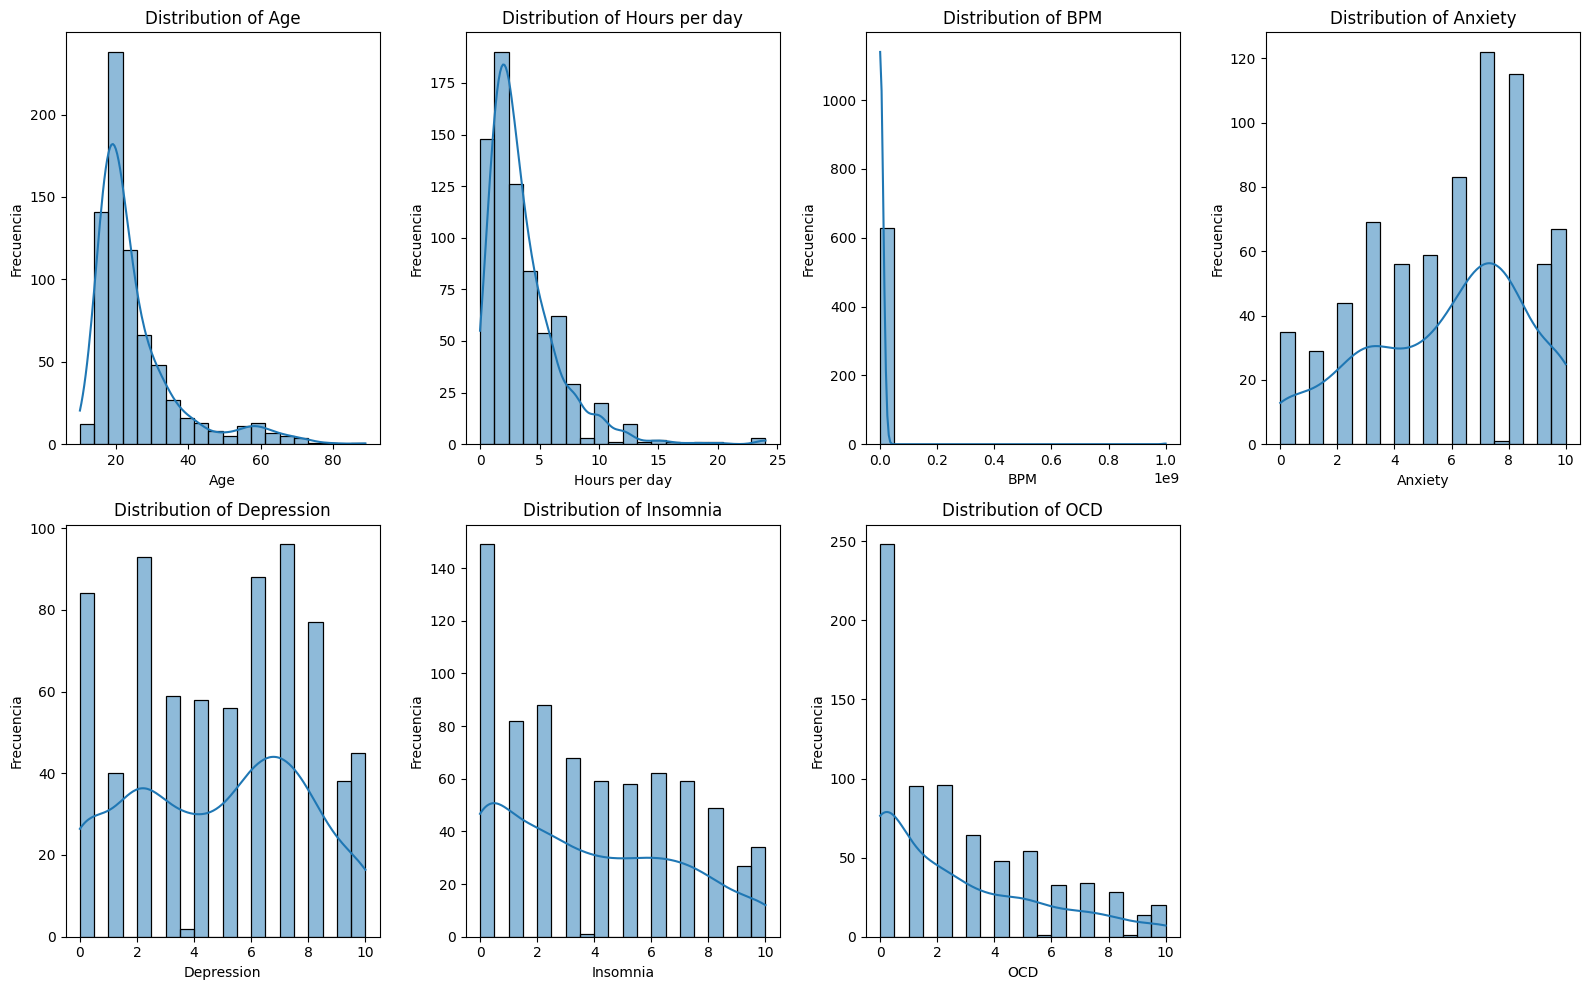

In [19]:
# Crear la figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))  
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Graficar cada distribución
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title("Distribution of " + col)

# Ocultar el subplot vacío (porque hay 7 gráficos y un espacio de 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


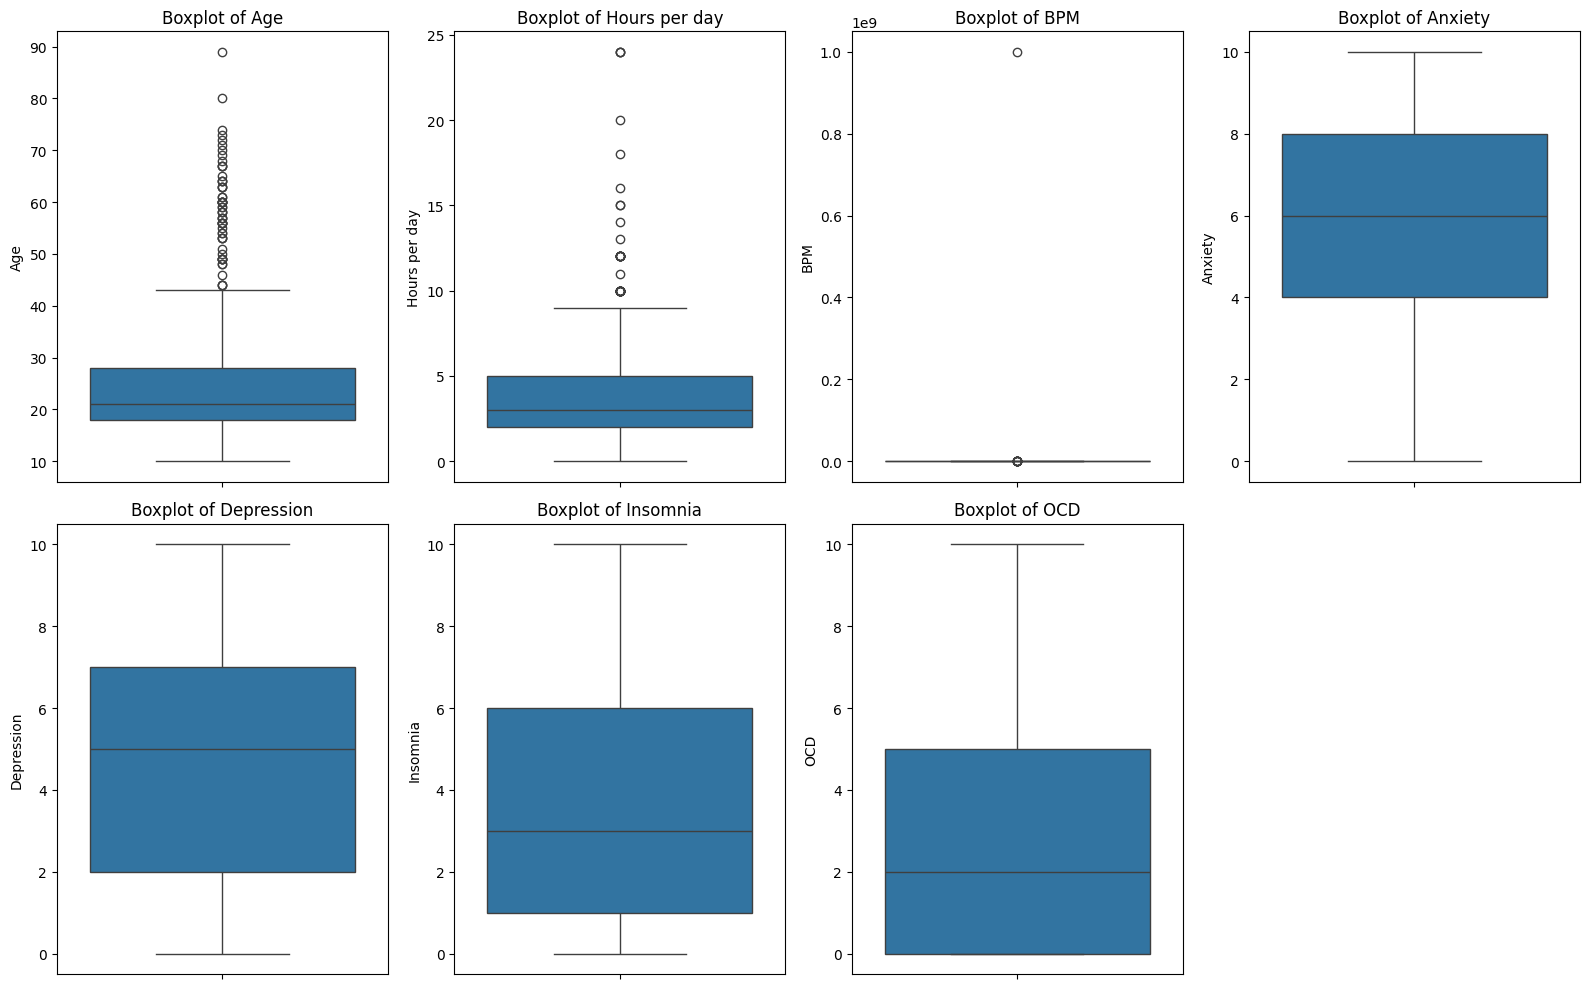

In [20]:
# Crear la figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Graficar cada boxplot
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title("Boxplot of " + col)

# Ocultar el subplot vacío si es necesario
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Categorical Values

Now lets analyze some of the most important categorical values

In [23]:
# Select only numeric columns for correlation
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.columns)

Index(['Timestamp', 'Primary streaming service', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects',
       'Permissions'],
      dtype='object')


In [28]:
# Definir las columnas a graficar
columns = ['Primary streaming service', 'Fav genre', 'Music effects']

/var/folders/qp/xg6wbr314v34q4vszdf0dhyw0000gn/T/ipykernel_14290/2416103167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
/var/folders/qp/xg6wbr314v34q4vszdf0dhyw0000gn/T/ipykernel_14290/2416103167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
/var/folders/qp/xg6wbr314v34q4vszdf0dhyw0000gn/T/ipykernel_14290/2416103167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax

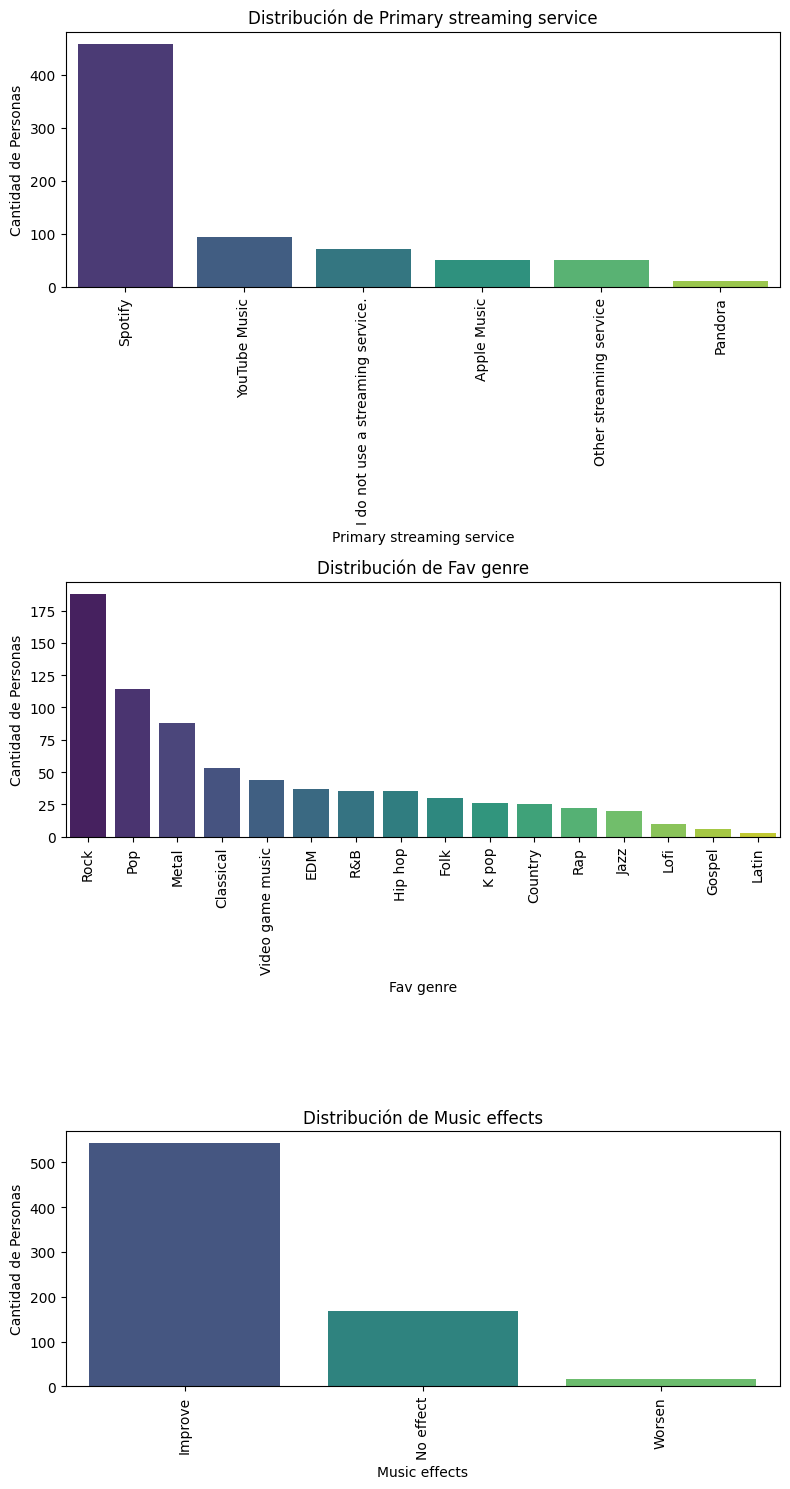

In [30]:
# Crear figura y subplots con una columna y tres filas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Iterar sobre cada columna y graficar su distribución
for i, col in enumerate(columns):
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Cantidad de Personas')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas para mejor visualización

plt.tight_layout()
plt.show()
    